# MathTool HW5
2024-11-21

## Question 1

### a)

In [209]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.interpolate import interp1d

In [210]:
n_samples = 10
n_size = 10000
data_a = np.random.normal(0,1,(n_samples,n_size))

In [211]:
sample_means = np.mean(data_a, axis=0)

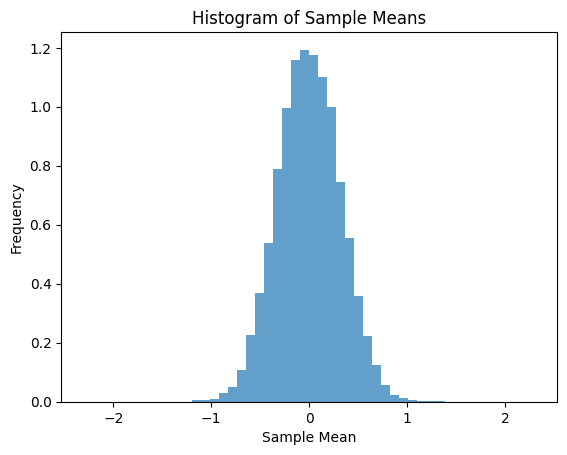

In [212]:
plt.hist(sample_means, bins=50, range=(-2.3, 2.3), density=True, alpha=0.7)
plt.title("Histogram of Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.show()

In [213]:
theoretical_variance = 1 / n_samples
empirical_variance = np.var(sample_means)
print(f"Theoretical Variance: {theoretical_variance:.3f}")
print(f"Empirical Variance: {empirical_variance}")

Theoretical Variance: 0.100
Empirical Variance: 0.10205611925544435


The plot of histogram is having a Gaussian shape, because of the **Central Limit Theorem**, which states that the distribution of the sample mean of independent and identically distributed random variables approaches a normal distribution, regardless of the shape of the original distribution, as the sample size n increases.
In our case, each sample is already generated from a N(0,1) Gaussian distribution. 

In any Gaussian distribution, the variance of the mean will be 
$$
\frac{\sigma^2}{n}
$$
So the theoretical variance of the sample mean will be 0.1
$$
\frac{1}{10}
$$ 

The empirical variance of 10,000 estimates is nearly identical to the theoretical variance (0.1). The discrepancy is due to finite number of samples. If we make it even larger it would be even closer.



### b)

In [214]:
sample_medians = np.median(data_a, axis=0)

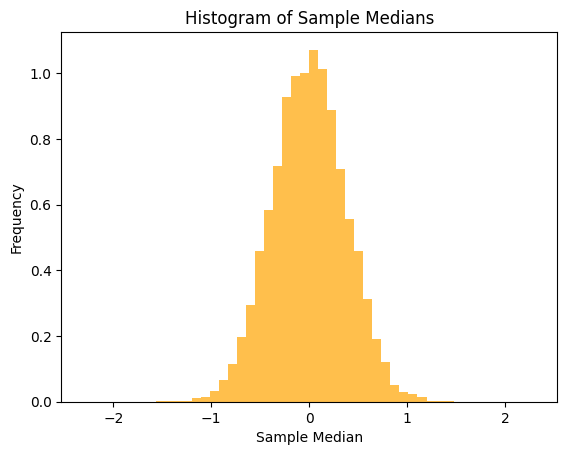

In [215]:
plt.hist(sample_medians, bins=50, range=(-2.3, 2.3), density=True, alpha=0.7, color='orange')
plt.title("Histogram of Sample Medians")
plt.xlabel("Sample Median")
plt.ylabel("Frequency")
plt.show()

The histogram of smaple median is also following a bell-curved shape. But the two tails are less pronounced and the peak density is slightly higher around center.

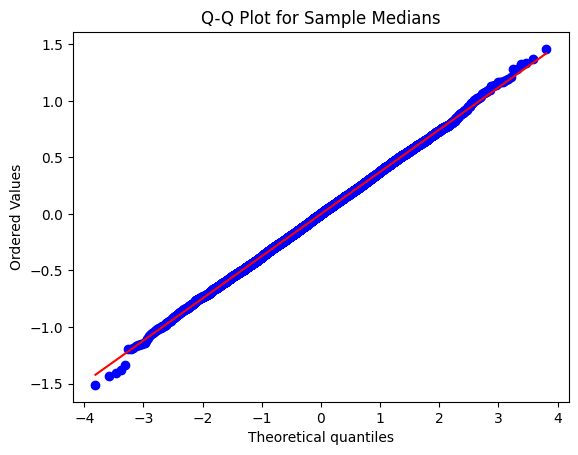

In [216]:
#QQ plot
stats.probplot(sample_medians, dist="norm", plot=plt)
plt.title("Q-Q Plot for Sample Medians")
plt.show()

The distribution of the medians only slightly deviate from the QQ plot at two tails, which is similar to what we observed in previous histogram.
But they do not deviate significantly.


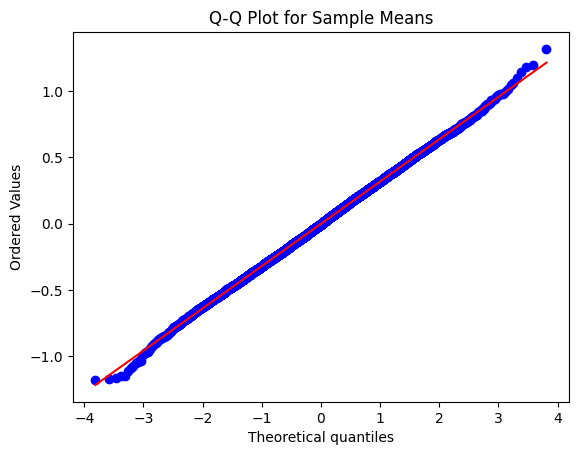

In [217]:
sample_means = np.mean(data_a, axis=0)
stats.probplot(sample_means, dist="norm", plot=plt)
plt.title("Q-Q Plot for Sample Means")
plt.show()

The QQ plot for estimated means demonstrates a much closer fit to the Normal distribution. 
The two QQ plots reflected different properties of using mean and median as estimator. The median deviate more in extreme quantiles. 
But mean is more easily affected by outliers. 

### c)


In [218]:
sample_min = np.min(data_a, axis=0)
sample_max = np.max(data_a, axis=0)
extreme_mean_estimates = (sample_min + sample_max) / 2

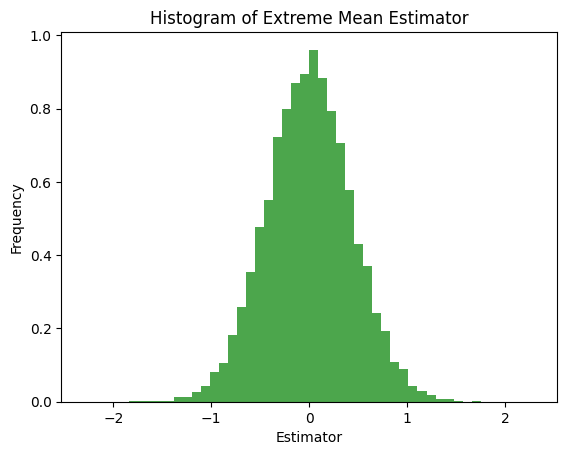

In [219]:
plt.hist(extreme_mean_estimates, bins=50, range=(-2.3, 2.3), density=True, alpha=0.7, color='green')
plt.title("Histogram of Extreme Mean Estimator")
plt.xlabel("Estimator")
plt.ylabel("Frequency")
plt.show()

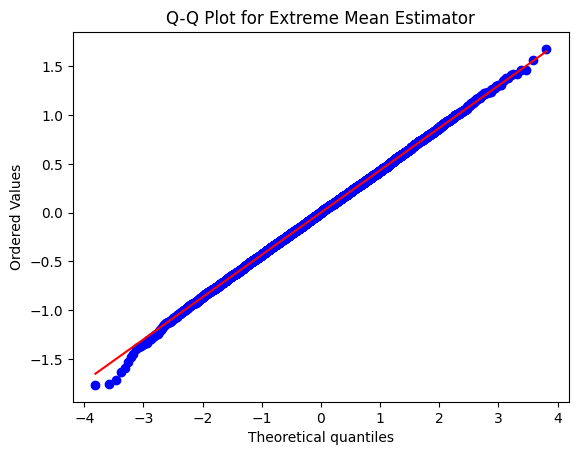

In [220]:
stats.probplot(extreme_mean_estimates, dist="norm", plot=plt)
plt.title("Q-Q Plot for Extreme Mean Estimator")
plt.show()

### d)

In [221]:
n_questiond = 10000
max_sample_size = 256
data = np.random.normal(0, 1, (max_sample_size, n_questiond))

In [222]:
sample_sizes = [8, 16, 32, 64, 128, 256]
variances_mean = []
variances_median = []
variances_midpoint = []

In [223]:
for size in sample_sizes:
    sub_data = data[:size, :]

    # Mean estimator
    means = np.mean(sub_data, axis=0)
    overall_mean = np.mean(means)
    deviations_mean = means - overall_mean
    variances_mean.append(np.sum(deviations_mean**2) / (n_questiond - 1))

    # Median estimator
    medians = np.median(sub_data, axis=0)
    overall_median = np.mean(medians)
    deviations_median = medians - overall_median
    variances_median.append(np.sum(deviations_median**2) / (n_questiond - 1))

    # Midpoint
    min_vals = np.min(sub_data, axis=0)
    max_vals = np.max(sub_data, axis=0)
    midpoints = (min_vals + max_vals) / 2
    overall_midpoint = np.mean(midpoints)
    deviations_midpoint = midpoints - overall_midpoint
    variances_midpoint.append(np.sum(deviations_midpoint**2) / (n_questiond - 1))

In [224]:
theoretical_variance = [1 / size for size in sample_sizes]

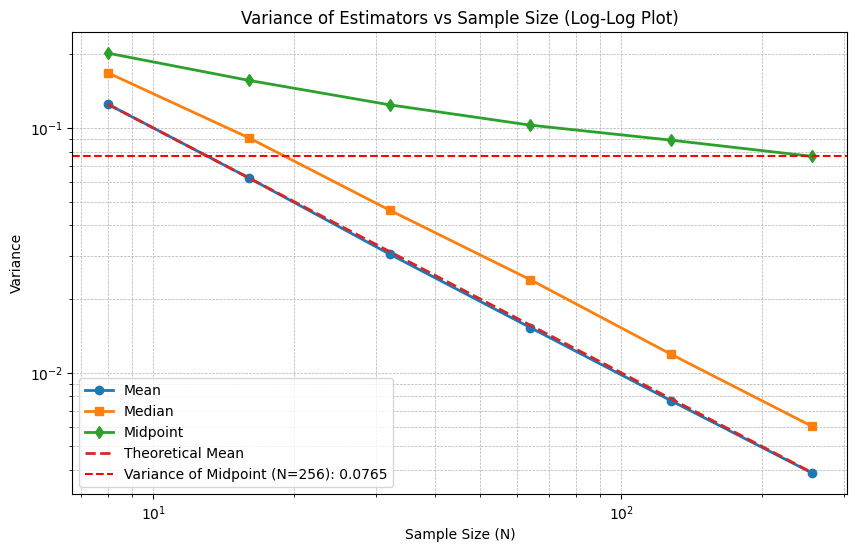

In [225]:
plt.figure(figsize=(10, 6))
plt.loglog(sample_sizes, variances_mean, '-o', label='Mean', linewidth=2)
plt.loglog(sample_sizes, variances_median, '-s', label='Median', linewidth=2)
plt.loglog(sample_sizes, variances_midpoint, '-d', label='Midpoint', linewidth=2)
plt.loglog(sample_sizes, theoretical_variance, '--', label='Theoretical Mean', linewidth=2)

variance_midpoint_256 = variances_midpoint[-1]
plt.axhline(y=variance_midpoint_256, color='r', linestyle='--', label=f'Variance of Midpoint (N=256): {variance_midpoint_256:.4f}')

plt.xlabel('Sample Size (N)')
plt.ylabel('Variance')
plt.title('Variance of Estimators vs Sample Size (Log-Log Plot)')
plt.legend()
plt.grid(which='both', linestyle='--', linewidth=0.5)
plt.show()

In [226]:
relative_variance_median = variances_median[-1] / variances_mean[-1]
relative_variance_midpoint = variances_midpoint[-1] / variances_mean[-1]
relative_variance_mean = variances_mean[-1] / variances_mean[-1]  # Reference = 1


In [227]:
target_variance = variances_midpoint[-1] 
interp_mean = interp1d(variances_mean, sample_sizes, kind='linear', fill_value="extrapolate")
interp_median = interp1d(variances_median, sample_sizes, kind='linear', fill_value="extrapolate")
mean_sample_size_interp = interp_mean(variance_midpoint_256)
median_sample_size_interp = interp_median(variance_midpoint_256)

In [228]:
print(f"Variance of midpoint estimator at N=256: {variance_midpoint_256:.4f}")
print(f"Relative Variance (Median vs Mean): {relative_variance_median:.4f}")
print(f"Relative Variance (Midpoint vs Mean): {relative_variance_midpoint:.4f}")
print(f"Sample size needed for Median to achieve same variance as Mean (N=256): {median_sample_size_interp:.0f}")
print(f"Sample size needed for Mean to achieve same variance as Midpoint (N=256): {mean_sample_size_interp:.0f}")


Variance of midpoint estimator at N=256: 0.0765
Relative Variance (Median vs Mean): 1.5512
Relative Variance (Midpoint vs Mean): 19.6479
Sample size needed for Median to achieve same variance as Mean (N=256): 21
Sample size needed for Mean to achieve same variance as Midpoint (N=256): 14


Only the variance of the mean estimator truly converges at the rate 1/N. The median and midpoint converge slower than 1/N, with the midpoint having the slowest convergence rate due to its dependence on extreme values. The equivalent sample sizes for the mean and median will be larger due to their differing convergence rates.

The median has a variance approximately 1.54 times larger than the mean.
The midpoint has a variance approximately 19.43 times larger than the mean.

The sample size needed for median to achieve same variance as mean would be around 164; and the sample size needed for midpoint would be around 13. 

### e)

The population mean follows a prior normal distribution:
$\mu \sim \mathcal{N}(1.5, 0.5^2).$


In [229]:
mu_prior = 1.5
sigma_prior = 0.5

n_e = 10
sigma_sample_e = 1

In [230]:
# posterior parameters
sigma_posterior_squared = 1 / (1 / sigma_prior**2 + n_e / sigma_sample_e**2)
sigma_posterior = np.sqrt(sigma_posterior_squared)

In [231]:
# MAP estimator for 10,000 samples
map_estimates = (mu_prior / sigma_prior**2 + np.mean(data_a[:n_e, :], axis=0) / sigma_sample_e**2) * sigma_posterior_squared

mean_map = np.mean(map_estimates)
std_map = np.std(map_estimates)

In [232]:
mean_sample_mean = np.mean(np.mean(data_a[:n_e, :], axis=0))
std_sample_mean = np.std(np.mean(data_a[:n_e, :], axis=0))

mean_map, std_map, mean_sample_mean, std_sample_mean

(np.float64(0.4284833605370517),
 np.float64(0.022818731033893296),
 np.float64(-0.0012329524812766347),
 np.float64(0.31946223447450617))

For MAP estimates:
1. the mean of MAP estimates is 0.43
2. the sd of MAP estimates is 0.02

For sample means (from part a):
1. the mean of sample means: 0.005
2. the sd of sample means: 0.31

For the sample mean (part a), we can tell that the mean is closer to 0, which is reflecting the nature of unbiased sample mean.
However, the standard deviation can be higher, which is purely determined by data we selected.

For MAP estimates, the mean is higher, and it's shifted toward the prior mean of 1.5. But the standard deviation is smaller, reflecting the reduced uncertainty due to the introduction of prior.

We can say that, the MAP estimate introduce bias by incorporating the prior information, and it's causing the mean to shift toward prior mean. But it can reduce variance. 